In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import tensorflow as tf
from tensorflow import keras

In [3]:
print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas: 2.2.2
Numpy: 2.0.2
Sklearn: 1.6.1
Matplotlib: 3.10.0
Keras: 3.10.0


In [4]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [5]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import joblib

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.optimizers import Adam

In [6]:
df=pd.read_csv('/content/drive/MyDrive/heart.csv')

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df.shape

(918, 12)

In [10]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
df = df.dropna(axis=0)
df.shape

(918, 12)

In [13]:
df['Sex'].replace({'M':1,'F':0},inplace=True)


/tmp/ipython-input-570654481.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'M':1,'F':0},inplace=True)
/tmp/ipython-input-570654481.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'].replace({'M':1,'F':0},inplace=True)


In [14]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [15]:
df['ChestPainType'].replace({'TA':0,'ATA':1,'NAP':2,'ASY':3},inplace=True)

/tmp/ipython-input-2983633341.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ChestPainType'].replace({'TA':0,'ATA':1,'NAP':2,'ASY':3},inplace=True)
/tmp/ipython-input-2983633341.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ChestPainType'].replace({'TA':0,'ATA':1,'NAP':2,'ASY':3},

In [16]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [17]:
df['RestingECG'].replace({'Normal':0,'ST':1,'LVH':2},inplace=True)

/tmp/ipython-input-422470333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RestingECG'].replace({'Normal':0,'ST':1,'LVH':2},inplace=True)
/tmp/ipython-input-422470333.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RestingECG'].replace({'Normal':0,'ST':1,'LVH':2},inplace=True)


In [18]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [19]:
df['ExerciseAngina'].replace({'N':0,'Y':1},inplace=True)

/tmp/ipython-input-1495200903.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ExerciseAngina'].replace({'N':0,'Y':1},inplace=True)
/tmp/ipython-input-1495200903.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ExerciseAngina'].replace({'N':0,'Y':1},inplace=True)


In [20]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [21]:
df['ST_Slope'].replace({'Up':0, 'Flat':1, 'Down':2}, inplace=True)

/tmp/ipython-input-89127814.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ST_Slope'].replace({'Up':0, 'Flat':1, 'Down':2}, inplace=True)
/tmp/ipython-input-89127814.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ST_Slope'].replace({'Up':0, 'Flat':1, 'Down':2}, inplace=True)


In [22]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,2.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [23]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0


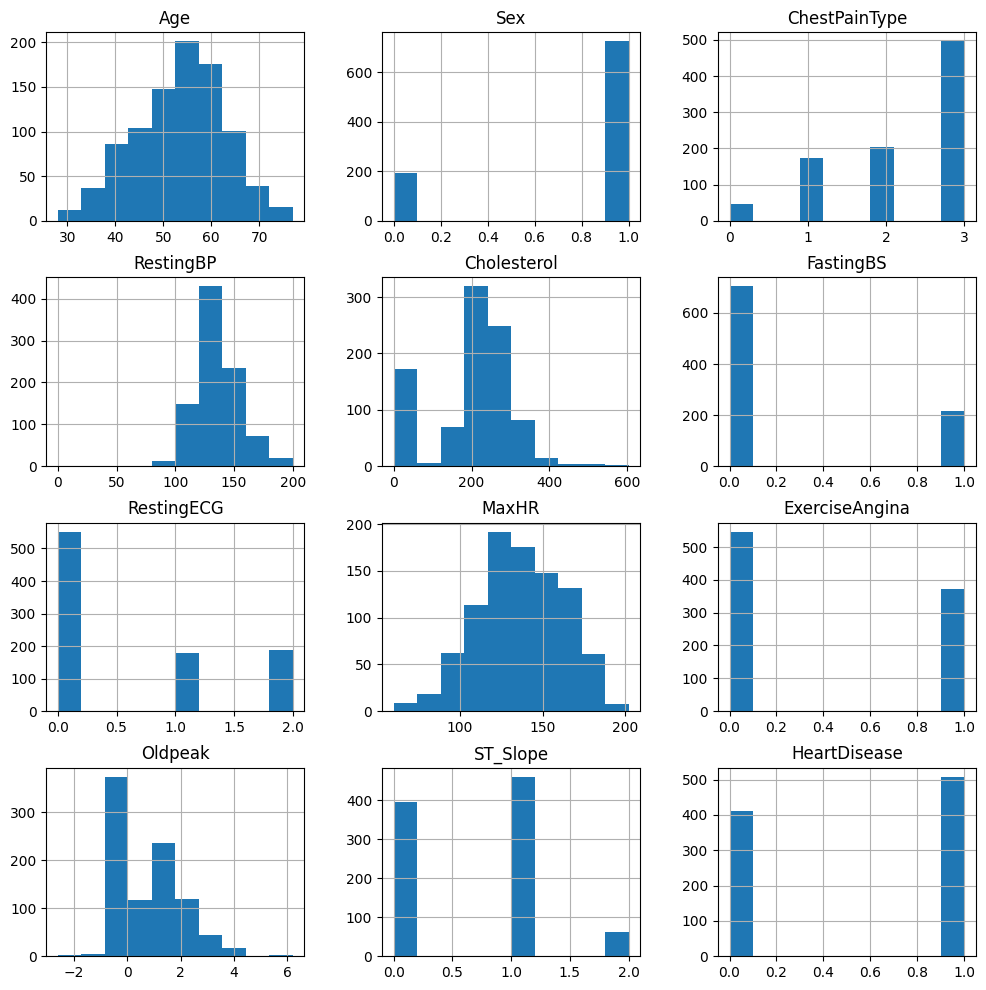

In [24]:
df.hist(figsize=(12,12))
plt.show()

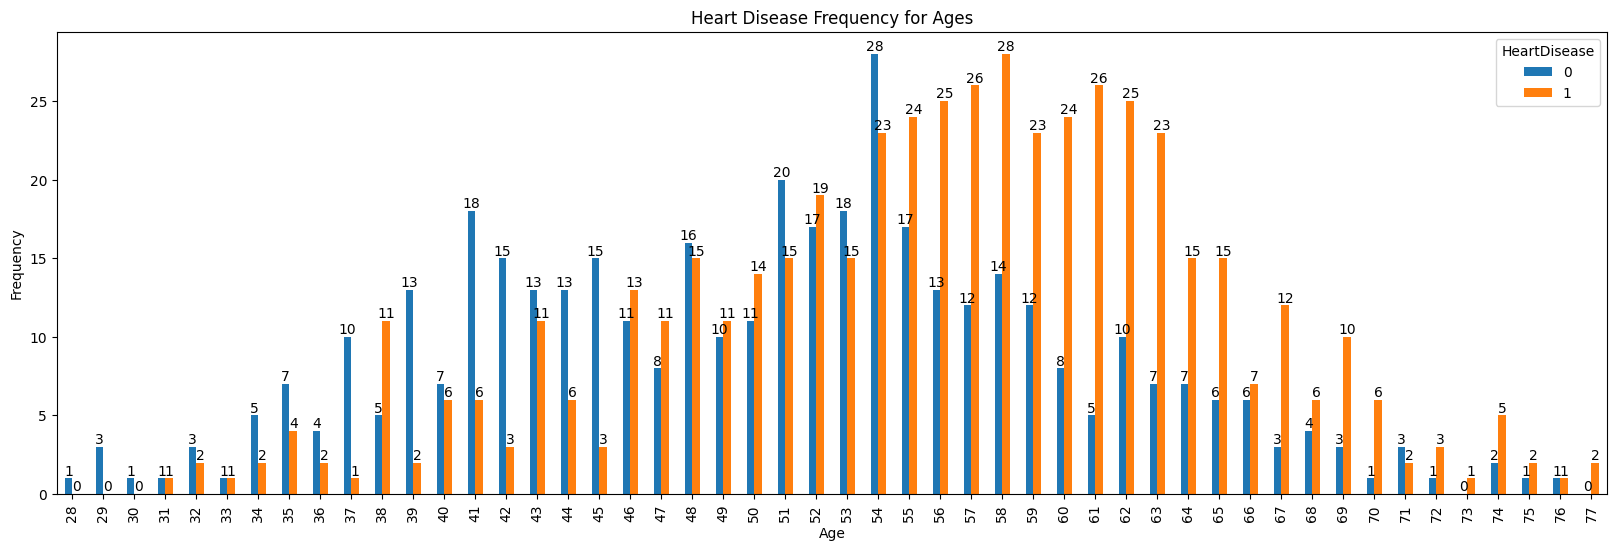

In [25]:
ax=pd.crosstab(df.Age,df.HeartDisease).plot(kind='bar',figsize=(20,6))

for container in ax.containers:
  ax.bar_label(container,label_type='edge')
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

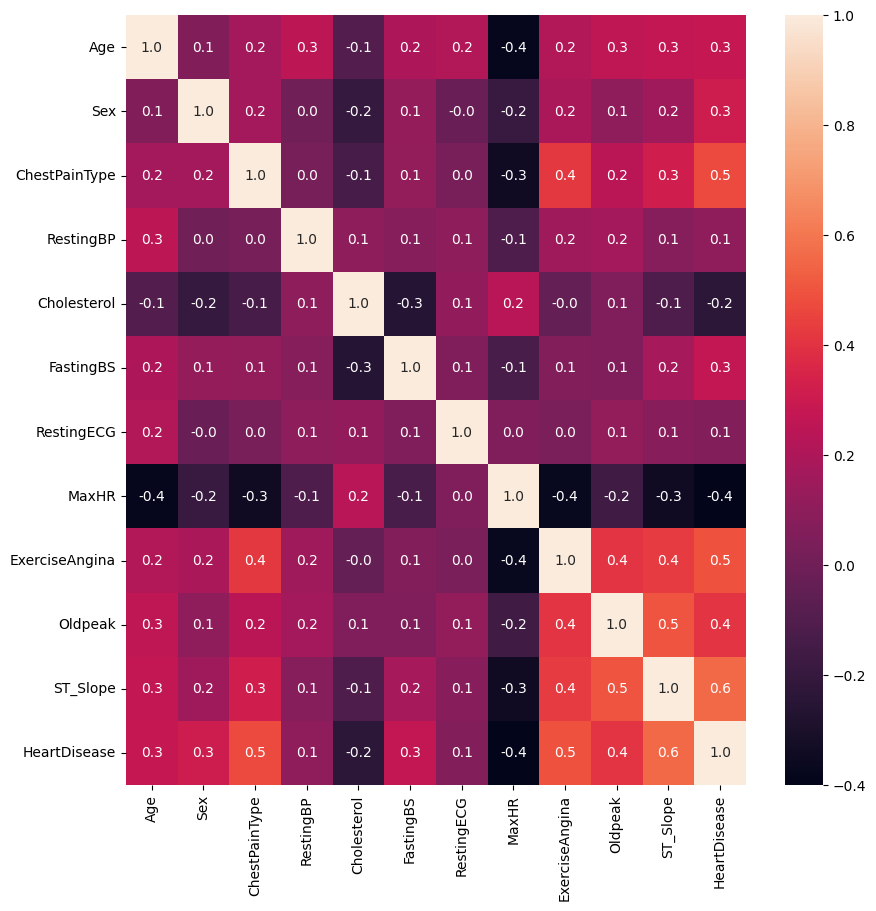

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [27]:
X = np.array(df.drop(['HeartDisease'], axis=1))

In [28]:
y = np.array(df['HeartDisease'])

In [29]:
X

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  1. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  0. ]])

In [30]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

In [32]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (734, 11), y_train: (734,)
X_test: (184, 11), y_test: (184,)


In [33]:
scaler=StandardScaler()

In [34]:
X_train_scaled=scaler.fit_transform(X_train)


In [35]:
X_train_scaled

array([[ 0.9700116 ,  0.51740017, -1.33199201, ...,  1.20277457,
         0.31704567,  0.60472665],
       [ 0.12202766,  0.51740017, -1.33199201, ..., -0.83141099,
        -0.44035554, -1.06395516],
       [ 0.54601963, -1.93273999,  0.79109623, ...,  1.20277457,
         0.60107112,  0.60472665],
       ...,
       [ 0.54601963,  0.51740017,  0.79109623, ...,  1.20277457,
         0.41172082,  2.27340846],
       [ 0.75801561,  0.51740017,  0.79109623, ...,  1.20277457,
        -0.81905614, -1.06395516],
       [-0.93795226,  0.51740017,  0.79109623, ..., -0.83141099,
        -0.81905614, -1.06395516]])

In [36]:
joblib.dump(scaler, 'scaler_obj.joblib')

['scaler_obj.joblib']

In [37]:
loaded_scaler=joblib.load('scaler_obj.joblib')

In [38]:
X_test_scaled=loaded_scaler.transform(X_test)

In [39]:
X_test_scaled

array([[-0.83195427,  0.51740017,  0.79109623, ...,  1.20277457,
         0.60107112,  0.60472665],
       [ 0.44002164,  0.51740017, -0.27044789, ..., -0.83141099,
         2.21054868, -1.06395516],
       [ 0.65201762,  0.51740017,  0.79109623, ...,  1.20277457,
         1.83184808,  0.60472665],
       ...,
       [-0.51396029,  0.51740017, -2.39353614, ..., -0.83141099,
         2.02119838,  0.60472665],
       [ 0.54601963,  0.51740017,  0.79109623, ...,  1.20277457,
         0.31704567,  0.60472665],
       [ 0.33402364,  0.51740017, -0.27044789, ..., -0.83141099,
        -0.53503069,  0.60472665]])

In [40]:
import os

# Create directories if they don't exist
if not os.path.exists('scaled_models'):
    os.makedirs('scaled_models')
if not os.path.exists('unscaled_models'):
    os.makedirs('unscaled_models')

In [41]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [42]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

In [43]:
lr = LogisticRegression(random_state=1234)

In [44]:
grid_search=GridSearchCV(lr,param_grid,cv=5,scoring='accuracy')

In [45]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1234),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy')

In [46]:
best_params=grid_search.best_params_
print("Best params",best_params)

Best params {'C': 100, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [47]:
best_lr=grid_search.best_estimator_

In [48]:
lr_prediction=best_lr.predict(X_test)

Confusion Matrix:
[[67 15]
 [ 8 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        82
           1       0.86      0.92      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184

Testing Accuracy for Logistic Regression: 0.875
Testing Sensitivity for Logistic Regression: 0.8933333333333333
Testing Specificity for Logistic Regression: 0.8623853211009175
Testing Precision for Logistic Regression: 0.8170731707317073


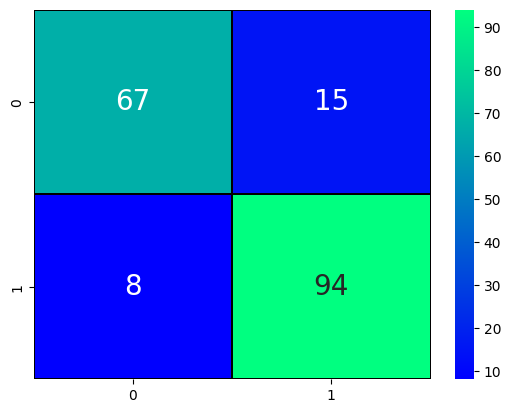

In [49]:
cm = confusion_matrix(y_test, lr_prediction)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, lr_prediction))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [50]:
# Evaluate the model using cross-validation
scores = cross_val_score(best_lr, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean of cross-validation scores
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.88435374 0.88435374 0.85034014 0.81632653 0.81506849]
Mean Cross-Validation Score: 0.8500885285621098


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

#Logistic regression

In [51]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

lr = LogisticRegression(random_state=1234)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_so

Confusion Matrix:
[[69 13]
 [ 9 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.88      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Testing Accuracy for Logistic Regression: 0.8804347826086957
Testing Sensitivity for Logistic Regression: 0.8846153846153846
Testing Specificity for Logistic Regression: 0.8773584905660378
Testing Precision for Logistic Regression: 0.8414634146341463


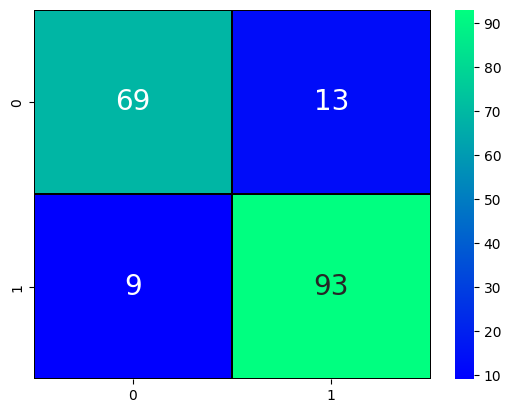

In [52]:
best_lr_scaled = grid_search.best_estimator_
lr_prediction_scaled = best_lr_scaled.predict(X_test_scaled)
cm = confusion_matrix(y_test, lr_prediction_scaled)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, lr_prediction_scaled))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [53]:
# Evaluate the model using cross-validation
scores = cross_val_score(best_lr_scaled, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean of cross-validation scores
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.89795918 0.89115646 0.85034014 0.80952381 0.80136986]
Mean Cross-Validation Score: 0.8500698909700868


In [54]:
# Save the Scaled model

joblib.dump(best_lr_scaled, 'scaled_models/lr_scaled_model.pkl')

# Save the unscaled model
joblib.dump(best_lr, 'unscaled_models/lr_unscaled_model.pkl')

['unscaled_models/lr_unscaled_model.pkl']

##scaled data

In [55]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

lr = LogisticRegression(random_state=1234)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_so

Confusion Matrix:
[[69 13]
 [ 9 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.88      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Testing Accuracy for Logistic Regression: 0.8804347826086957
Testing Sensitivity for Logistic Regression: 0.8846153846153846
Testing Specificity for Logistic Regression: 0.8773584905660378
Testing Precision for Logistic Regression: 0.8414634146341463


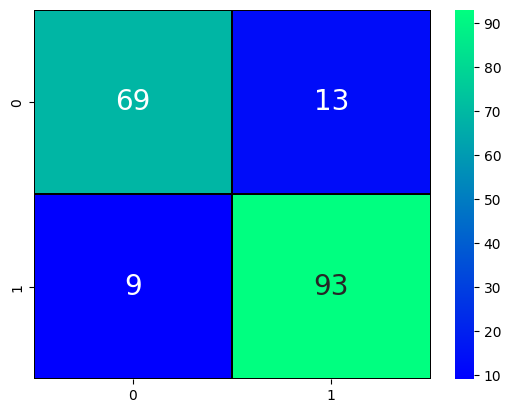

In [56]:
best_lr_scaled = grid_search.best_estimator_
lr_prediction_scaled = best_lr_scaled.predict(X_test_scaled)
cm = confusion_matrix(y_test, lr_prediction_scaled)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, lr_prediction_scaled))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

#Decision Tree

In [57]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

In [58]:
param_grid={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[None]+list(np.arange(1,21)),
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2',None]
}

In [59]:
dt = DecisionTreeClassifier(random_state=1234)

In [60]:
random_search=RandomizedSearchCV(dt,param_distributions=param_grid,cv=5,scoring='accuracy',n_iter=10,random_state=1234)

In [61]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1234),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, np.int64(1),
                                                      np.int64(2), np.int64(3),
                                                      np.int64(4), np.int64(5),
                                                      np.int64(6), np.int64(7),
                                                      np.int64(8), np.int64(9),
                                                      np.int64(10),
                                                      np.int64(11),
                                                      np.int64(12),
                                                      np.int64(13),
                                                      np.int64(14),
                                                      np.int64(15),
                                                      np.int64(16),
                                                      np.int64(17),
                                                      np.int64(18),
                                                      np.int64(19),
                                                      np.int64(20)],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=1234, scoring='accuracy')

In [62]:
best_params=random_search.best_params_
print("Best params",best_params)

Best params {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': np.int64(17), 'criterion': 'gini'}


In [63]:
best_dt=random_search.best_estimator_
dt_prediction=best_dt.predict(X_test)

Confusion Matrix:
[[66 16]
 [15 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        82
           1       0.84      0.85      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

Testing Accuracy for Decision Tree: 0.8315217391304348
Testing Sensitivity for Decision Tree: 0.8148148148148148
Testing Specificity for Decision Tree: 0.8446601941747572
Testing Precision for Decision Tree: 0.8048780487804879


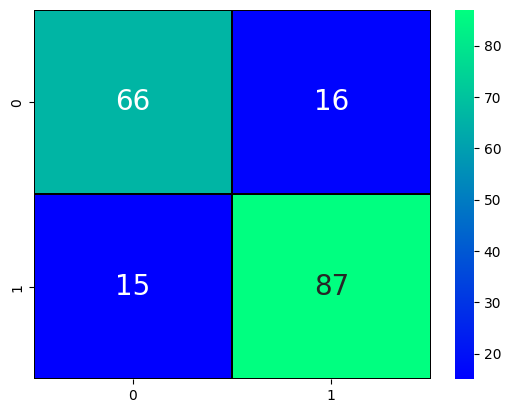

In [64]:
cm = confusion_matrix(y_test, dt_prediction)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, dt_prediction))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

In [65]:
# Evaluate the model using cross-validation
scores = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean of cross-validation scores
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.91156463 0.82312925 0.8707483  0.85714286 0.78082192]
Mean Cross-Validation Score: 0.8486813903643651


#Scaled data

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

In [67]:


param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(np.arange(1, 21)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Instantiate Decision Tree classifier
dt = DecisionTreeClassifier(random_state=1234)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=1234)

# Fit the random search to the data
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': np.int64(14), 'criterion': 'gini'}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

Confusion Matrix:
[[82  0]
 [83 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66        82
           1       1.00      0.19      0.31       102

    accuracy                           0.55       184
   macro avg       0.75      0.59      0.49       184
weighted avg       0.78      0.55      0.47       184

Testing Accuracy for Decision Tree: 0.5489130434782609
Testing Sensitivity for Decision Tree: 0.49696969696969695
Testing Specificity for Decision Tree: 1.0
Testing Precision for Decision Tree: 1.0


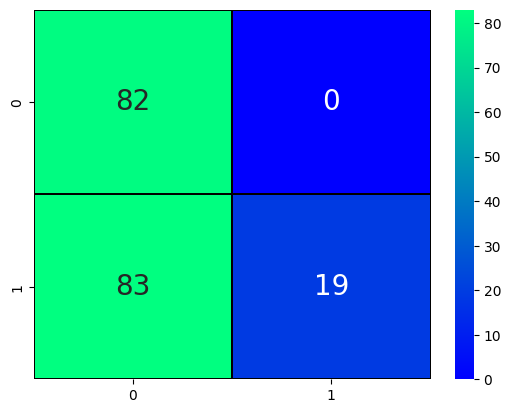

In [68]:
# Get the best estimator
best_dt_scaled = random_search.best_estimator_

# Use the best estimator for prediction
dt_prediction_scaled = best_dt.predict(X_test_scaled)

# Evaluate the model and print metrics
cm = confusion_matrix(y_test, dt_prediction_scaled)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, dt_prediction_scaled))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

In [69]:
# Evaluate the model using cross-validation
scores = cross_val_score(best_dt_scaled, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean of cross-validation scores
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.85714286 0.86394558 0.8707483  0.84353741 0.82191781]
Mean Cross-Validation Score: 0.8514583915758085


In [70]:


joblib.dump(best_dt_scaled, 'scaled_models/dt_scaled_model.pkl')


joblib.dump(best_dt, 'unscaled_models/dt_unscaled_model.pkl')

['unscaled_models/dt_unscaled_model.pkl']

#RandomForestClassifier


##Original data

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

In [72]:
param_grid={
    'n_estimators':[100,200,300,400,500],
    'criterion':['gini','entropy'],
    'max_depth':[None]+list(np.arange(10,110,10)),
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']
}


In [73]:
rf=RandomForestClassifier(random_state=1234)

In [74]:
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=1234)


In [75]:
random_search.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, np.int64(10),
                                                      np.int64(20),
                                                      np.int64(30),
                                                      np.int64(40),
                                                      np.int64(50),
                                                      np.int64(60),
                                                      np.int64(70),
                                                      np.int64(80),
                                                      np.int64(90),
                                                      np.int64(100)],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=1234, scoring='accuracy')

In [76]:
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': np.int64(20), 'criterion': 'gini'}


Confusion Matrix:
[[69 13]
 [ 7 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        82
           1       0.88      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

Testing Accuracy for Random Forest: 0.8913043478260869
Testing Sensitivity for Random Forest: 0.9078947368421053
Testing Specificity for Random Forest: 0.8796296296296297
Testing Precision for Random Forest: 0.8414634146341463


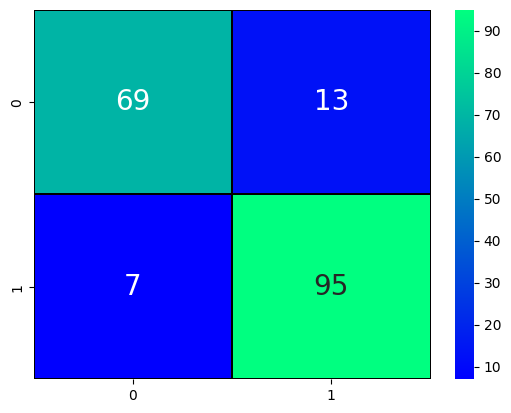

In [77]:
# Get the best estimator
best_rf = random_search.best_estimator_

# Use the best estimator for prediction
rf_prediction = best_rf.predict(X_test)

# Evaluate the model and print metrics
cm = confusion_matrix(y_test, rf_prediction)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, rf_prediction))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

##Scaled

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate Random Forest classifier
rf = RandomForestClassifier(random_state=1234)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=1234)

# Fit the random search to the data
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': np.int64(10), 'criterion': 'entropy'}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

Confusion Matrix:
[[68 14]
 [ 7 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

Testing Accuracy for Random Forest: 0.8858695652173914
Testing Sensitivity for Random Forest: 0.9066666666666666
Testing Specificity for Random Forest: 0.8715596330275229
Testing Precision for Random Forest: 0.8292682926829268


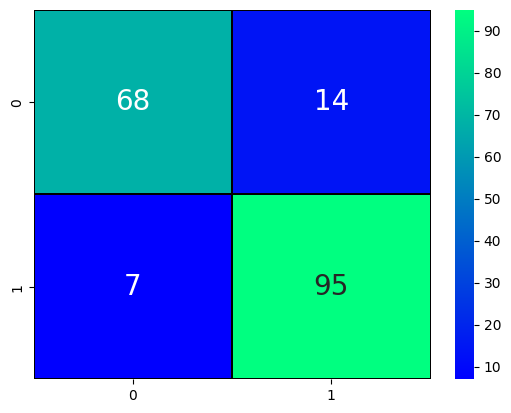

In [79]:
# Get the best estimator
best_rf_scaled = random_search.best_estimator_

# Use the best estimator for prediction
rf_prediction_scaled = best_rf_scaled.predict(X_test_scaled)

# Evaluate the model and print metrics
cm = confusion_matrix(y_test, rf_prediction_scaled)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, rf_prediction_scaled))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [80]:
# Evaluate the model using cross-validation
scores = cross_val_score(best_rf_scaled, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean of cross-validation scores
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.89115646 0.86394558 0.8707483  0.89115646 0.82876712]
Mean Cross-Validation Score: 0.8691547852017518


In [81]:
# Save the Scaled model

joblib.dump(best_rf_scaled, 'scaled_models/rf_scaled_model.pkl')

# Save the unscaled model
joblib.dump(best_rf, 'unscaled_models/rf_unscaled_model.pkl')

['unscaled_models/rf_unscaled_model.pkl']

#SVM


##Original Data

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

In [83]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

In [84]:

# Instantiate Support Vector Machine (SVM) classifier
svm = SVC(random_state=1234)

# Instantiate GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


Confusion Matrix:
[[69 13]
 [ 9 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.88      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Testing Accuracy for SVM: 0.8804347826086957
Testing Sensitivity for SVM: 0.8846153846153846
Testing Specificity for SVM: 0.8773584905660378
Testing Precision for SVM: 0.8414634146341463


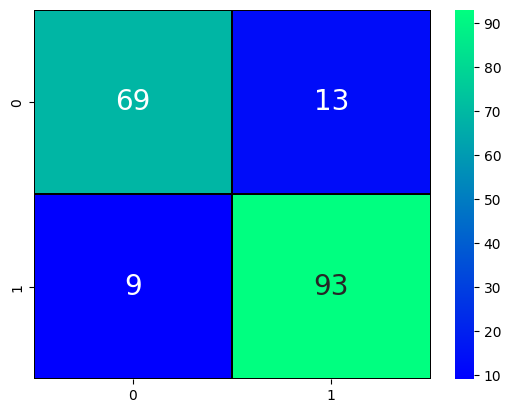

In [85]:
# Get the best estimator
best_svm = grid_search.best_estimator_

# Use the best estimator for prediction
svm_prediction = best_svm.predict(X_test)

# Evaluate the model and print metrics
cm = confusion_matrix(y_test, svm_prediction)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, svm_prediction))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for SVM:',(TP/(TP+FN)))
print('Testing Specificity for SVM:',(TN/(TN+FP)))
print('Testing Precision for SVM:',(TP/(TP+FP)))

##Scaled data

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Define a reduced parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# Instantiate Support Vector Machine (SVM) classifier
svm = SVC(random_state=1234)

# Instantiate RandomizedSearchCV with reduced parameters
random_search = RandomizedSearchCV(svm, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=1234)

# Fit the random search to the data
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}


Confusion Matrix:
[[73  9]
 [33 69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78        82
           1       0.88      0.68      0.77       102

    accuracy                           0.77       184
   macro avg       0.79      0.78      0.77       184
weighted avg       0.80      0.77      0.77       184

Testing Accuracy for SVM: 0.7717391304347826
Testing Sensitivity for SVM: 0.6886792452830188
Testing Specificity for SVM: 0.8846153846153846
Testing Precision for SVM: 0.8902439024390244


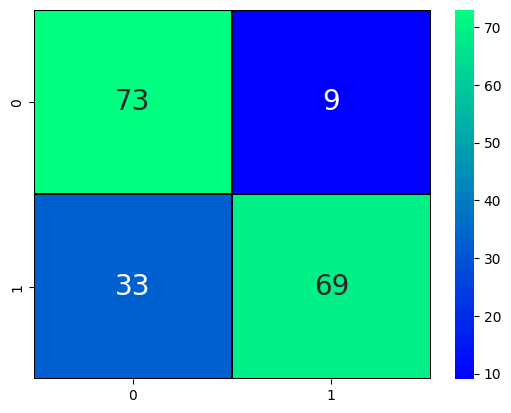

In [87]:
# Get the best estimator
best_svm_scaled = grid_search.best_estimator_

# Use the best estimator for prediction
svm_prediction_scaled = best_svm_scaled.predict(X_test_scaled)

# Evaluate the model and print metrics
cm = confusion_matrix(y_test, svm_prediction_scaled)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, svm_prediction_scaled))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for SVM:',(TP/(TP+FN)))
print('Testing Specificity for SVM:',(TN/(TN+FP)))
print('Testing Precision for SVM:',(TP/(TP+FP)))

In [88]:
# Evaluate the model using cross-validation
scores = cross_val_score(best_svm_scaled, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean of cross-validation scores
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.87755102 0.82993197 0.84353741 0.84353741 0.78767123]
Mean Cross-Validation Score: 0.8364458112011928


In [89]:
# Save the Scaled model

joblib.dump(best_svm_scaled, 'scaled_models/svm_scaled_model.pkl')

# Save the unscaled model
joblib.dump(best_svm, 'unscaled_models/svm_unscaled_model.pkl')

['unscaled_models/svm_unscaled_model.pkl']

K-nearest neighbour

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [91]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Instantiate K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


Confusion Matrix:
[[58 24]
 [22 80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72        82
           1       0.77      0.78      0.78       102

    accuracy                           0.75       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.75      0.75      0.75       184

Testing Accuracy for KNN: 0.75
Testing Sensitivity for KNN: 0.725
Testing Specificity for KNN: 0.7692307692307693
Testing Precision for KNN: 0.7073170731707317


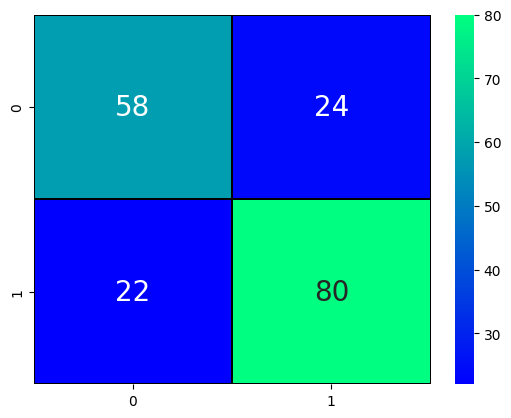

In [92]:

best_knn = grid_search.best_estimator_

# Use the best estimator for prediction
knn_prediction = best_knn.predict(X_test)

# Evaluate the model and print metrics
cm = confusion_matrix(y_test, knn_prediction)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, knn_prediction))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for KNN:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for KNN:',(TP/(TP+FN)))
print('Testing Specificity for KNN:',(TN/(TN+FP)))
print('Testing Precision for KNN:',(TP/(TP+FP)))

In [93]:
# Evaluate the model using cross-validation
scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean of cross-validation scores
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.82312925 0.7755102  0.74829932 0.71428571 0.70547945]
Mean Cross-Validation Score: 0.7533407883701426


##Scaled data

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [95]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Instantiate K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


Confusion Matrix:
[[72 10]
 [ 8 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        82
           1       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

Testing Accuracy for KNN: 0.9021739130434783
Testing Sensitivity for KNN: 0.9
Testing Specificity for KNN: 0.9038461538461539
Testing Precision for KNN: 0.8780487804878049


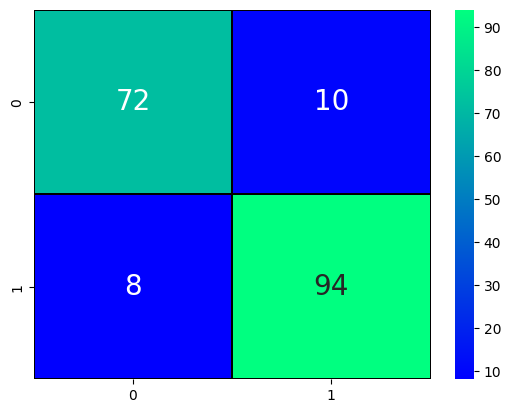

In [96]:
# Get the best estimator
best_knn_scaled = grid_search.best_estimator_

# Use the best estimator for prediction
knn_prediction_scaled = best_knn_scaled.predict(X_test_scaled)

# Evaluate the model and print metrics
cm = confusion_matrix(y_test, knn_prediction_scaled)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, knn_prediction_scaled))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for KNN:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for KNN:',(TP/(TP+FN)))
print('Testing Specificity for KNN:',(TN/(TN+FP)))
print('Testing Precision for KNN:',(TP/(TP+FP)))

In [97]:
# Evaluate the model using cross-validation
scores = cross_val_score(best_knn_scaled, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean of cross-validation scores
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.8707483  0.86394558 0.86394558 0.89115646 0.83561644]
Mean Cross-Validation Score: 0.8650824713447023


In [98]:
# Save the Scaled model

joblib.dump(best_knn_scaled, 'scaled_models/knn_scaled_model.pkl')

# Save the unscaled model
joblib.dump(best_knn, 'unscaled_models/knn_unscaled_model.pkl')

['unscaled_models/knn_unscaled_model.pkl']

#Xgboost

In [99]:
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Define a reduced parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
}

# Instantiate XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=1234)

# Instantiate GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Confusion Matrix:
[[73  9]
 [10 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        82
           1       0.91      0.90      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

Testing Accuracy for XGB: 0.8967391304347826
Testing Sensitivity for XGB: 0.8795180722891566
Testing Specificity for XGB: 0.9108910891089109
Testing Precision for XGB: 0.8902439024390244


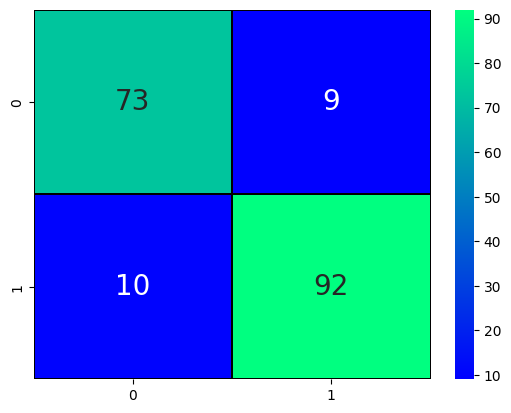

In [100]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_xgb = grid_search.best_estimator_

# Use the best estimator for prediction
xgb_prediction = best_xgb.predict(X_test)

# Evaluate the model and print metrics
cm = confusion_matrix(y_test, xgb_prediction)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, xgb_prediction))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for XGB:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for XGB:',(TP/(TP+FN)))
print('Testing Specificity for XGB:',(TN/(TN+FP)))
print('Testing Precision for XGB:',(TP/(TP+FP)))

In [101]:
# Evaluate the model using cross-validation
scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean of cross-validation scores
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.89115646 0.83673469 0.86394558 0.84353741 0.82191781]
Mean Cross-Validation Score: 0.8514583915758085


##Scaled

In [102]:
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Define a reduced parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
}

# Instantiate XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=1234)

# Instantiate GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


Confusion Matrix:
[[73  9]
 [10 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        82
           1       0.91      0.90      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

Testing Accuracy for XGB: 0.8967391304347826
Testing Sensitivity for XGB: 0.8795180722891566
Testing Specificity for XGB: 0.9108910891089109
Testing Precision for XGB: 0.8902439024390244


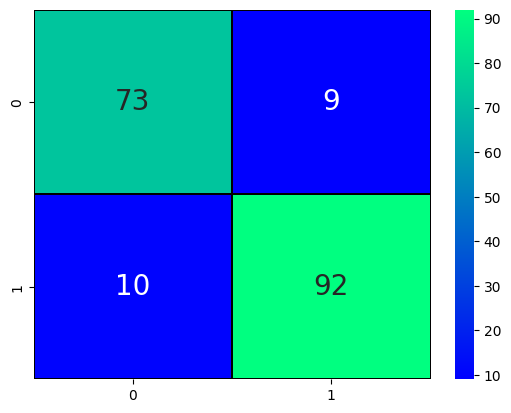

In [103]:
# Get the best estimator
best_xgb_scaled = grid_search.best_estimator_

# Use the best estimator for prediction
xgb_prediction_scaled = best_xgb_scaled.predict(X_test_scaled)

# Evaluate the model and print metrics
cm = confusion_matrix(y_test, xgb_prediction_scaled)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, xgb_prediction_scaled))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for XGB:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for XGB:',(TP/(TP+FN)))
print('Testing Specificity for XGB:',(TN/(TN+FP)))
print('Testing Precision for XGB:',(TP/(TP+FP)))

In [104]:
# Evaluate the model using cross-validation
scores = cross_val_score(best_xgb_scaled, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean of cross-validation scores
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.89115646 0.83673469 0.86394558 0.84353741 0.82191781]
Mean Cross-Validation Score: 0.8514583915758085


In [105]:
# Save the Scaled model

joblib.dump(best_xgb_scaled, 'scaled_models/xgb_scaled_model.pkl')

# Save the unscaled model
joblib.dump(best_xgb, 'unscaled_models/xgb_unscaled_model.pkl')

['unscaled_models/xgb_unscaled_model.pkl']

#Deep Learning

In [147]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score


def build_dl_model():
    model = Sequential()
    model.add(Input(shape=(11,)))

    model.add(Dense(
        16,
        activation="relu",
        kernel_initializer="normal",
        kernel_regularizer=regularizers.l2(0.01)
    ))
    model.add(Dropout(0.5))

    model.add(Dense(
        8,
        activation="relu",
        kernel_initializer="normal",
        kernel_regularizer=regularizers.l2(0.01)
    ))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        optimizer=Adam(learning_rate=0.0004),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model


# -------- TRAIN MODEL --------
dl_model = build_dl_model()

dl_model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

# -------- EVALUATE --------
y_pred = (dl_model.predict(X_test_scaled) >= 0.5).astype(int)
print("DL Accuracy:", accuracy_score(y_test, y_pred))


dl_model.save_weights("dl_weights.weights.h5")

print("✅ DL weights saved safely")


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5903 - loss: 0.6977 - val_accuracy: 0.6087 - val_loss: 0.6983
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5853 - loss: 0.6946 - val_accuracy: 0.6304 - val_loss: 0.6933
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6235 - loss: 0.6909 - val_accuracy: 0.6413 - val_loss: 0.6871
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6423 - loss: 0.6859 - val_accuracy: 0.6902 - val_loss: 0.6789
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7096 - loss: 0.6743 - val_accuracy: 0.7283 - val_loss: 0.6666
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6797 - loss: 0.6638 - val_accuracy: 0.7880 - val_loss: 0.6504
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6763 - loss: 0.6476 - val_accuracy: 0.8533 - val_loss: 0.6292
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7083 - loss: 0.6282 - val_accuracy: 0.8587 - val_loss

In [148]:
from google.colab import files
files.download("dl_weights.weights.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [135]:
def create_finetuned_binary_model(
    learning_rate=0.0004,
    dropout_rate=0.5,
    regularization_strength=0.01
):
    model = Sequential()

    # ✅ SAFE Input layer (NO batch_shape)
    model.add(Input(shape=(11,)))

    model.add(Dense(
        16,
        kernel_initializer='normal',
        kernel_regularizer=regularizers.l2(regularization_strength),
        activation='relu'
    ))
    model.add(Dropout(dropout_rate))

    model.add(Dense(
        8,
        kernel_initializer='normal',
        kernel_regularizer=regularizers.l2(regularization_strength),
        activation='relu'
    ))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )

    return model


finetuned_binary_model = create_finetuned_binary_model()
finetuned_binary_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
finetuned_history = finetuned_binary_model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=10
)


Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5773 - loss: 0.6966 - val_accuracy: 0.8261 - val_loss: 0.6900
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6958 - loss: 0.6875 - val_accuracy: 0.8696 - val_loss: 0.6743
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7540 - loss: 0.6710 - val_accuracy: 0.8533 - val_loss: 0.6439
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8022 - loss: 0.6434 - val_accuracy: 0.8696 - val_loss: 0.5996
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8310 - loss: 0.6004 - val_accuracy: 0.8750 - val_loss: 0.5444
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8452 - loss: 0.5364 - val_accuracy: 0.8696 - val_loss: 0.4941
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8414 - loss: 0.5263 - val_accuracy: 0.8641 - val_loss: 0.4644
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8376 - loss: 0.4780 - val_accuracy: 0.8696 - v

In [137]:
finetuned_binary_pred = np.round(
    finetuned_binary_model.predict(X_test_scaled)
).astype(int)

print("Results for Binary Model")
print("Accuracy:", accuracy_score(y_test, finetuned_binary_pred))
print(classification_report(y_test, finetuned_binary_pred))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Results for Binary Model
Accuracy: 0.8913043478260869
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        82
           1       0.87      0.95      0.91       102

    accuracy                           0.89       184
   macro avg       0.90      0.88      0.89       184
weighted avg       0.89      0.89      0.89       184



In [138]:
dl_cm = confusion_matrix(y_test, finetuned_binary_pred)

TP = dl_cm[0][0]
TN = dl_cm[1][1]
FN = dl_cm[1][0]
FP = dl_cm[0][1]

print("Testing Accuracy:", (TP + TN) / (TP + TN + FN + FP))
print("Testing Sensitivity:", TP / (TP + FN))
print("Testing Specificity:", TN / (TN + FP))
print("Testing Precision:", TP / (TP + FP))


Testing Accuracy: 0.8913043478260869
Testing Sensitivity: 0.9305555555555556
Testing Specificity: 0.8660714285714286
Testing Precision: 0.8170731707317073


In [139]:
pip install keras-tuner

In [140]:
import keras_tuner as kt
from tensorflow import keras


In [141]:
def build_model(hp):
    model = keras.Sequential()

    # ✅ SAFE Input layer
    model.add(keras.layers.Input(shape=(11,)))

    model.add(
        keras.layers.Dense(
            units=hp.Int("units_1", min_value=8, max_value=64, step=8),
            kernel_initializer="normal",
            kernel_regularizer=keras.regularizers.l2(
                hp.Choice("regularization", values=[0.001, 0.01, 0.1])
            ),
            activation="relu",
        )
    )

    model.add(
        keras.layers.Dropout(
            hp.Float("dropout", min_value=0.2, max_value=0.5, step=0.1)
        )
    )

    model.add(keras.layers.Dense(1, activation="sigmoid"))

    model.compile(
        loss="binary_crossentropy",
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice("learning_rate", [0.0001, 0.001, 0.01])
        ),
        metrics=["accuracy"],
    )

    return model


In [142]:
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    directory="keras_tuner_results",
    project_name="binary_classification",
)

tuner.search(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_data=(X_test_scaled, y_test),
)


Reloading Tuner from keras_tuner_results/binary_classification/tuner0.json


In [143]:
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:")
print(best_hyperparameters)

best_model = tuner.get_best_models(1)[0]
best_model.summary()


Best Hyperparameters:


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 521 (2.04 KB)

 Trainable params: 521 (2.04 KB)

 Non-trainable params: 0 (0.00 B)

In [144]:
best_model.save("dl_best_model.keras")


#Model Comparison


In [118]:
import joblib
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
ml_model_filenames = [
    "lr_scaled_model.pkl",
    "dt_scaled_model.pkl",
    "rf_scaled_model.pkl",
    "svm_scaled_model.pkl",
    "knn_scaled_model.pkl",
    "xgb_scaled_model.pkl"
]

dl_model_filename = "dl_best_model.keras"


In [120]:
ml_models = [joblib.load(f'scaled_models/{filename}') for filename in ml_model_filenames]


In [121]:
dl_model = load_model('dl_best_model.keras')


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [122]:
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [123]:
ml_model_metrics = [evaluate_model(model, X_test_scaled, y_test) for model in ml_models]

In [124]:
y_pred_dl = np.round(dl_model.predict(X_test_scaled)).astype(int)
accuracy_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = precision_score(y_test, y_pred_dl)
recall_dl = recall_score(y_test, y_pred_dl)
f1_dl = f1_score(y_test, y_pred_dl)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [125]:
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN", "XGB Classifier", "Deep Learning"]
accuracies = [metric[0] for metric in ml_model_metrics] + [accuracy_dl]
precisions = [metric[1] for metric in ml_model_metrics] + [precision_dl]
recalls = [metric[2] for metric in ml_model_metrics] + [recall_dl]
f1_scores = [metric[3] for metric in ml_model_metrics] + [f1_dl]

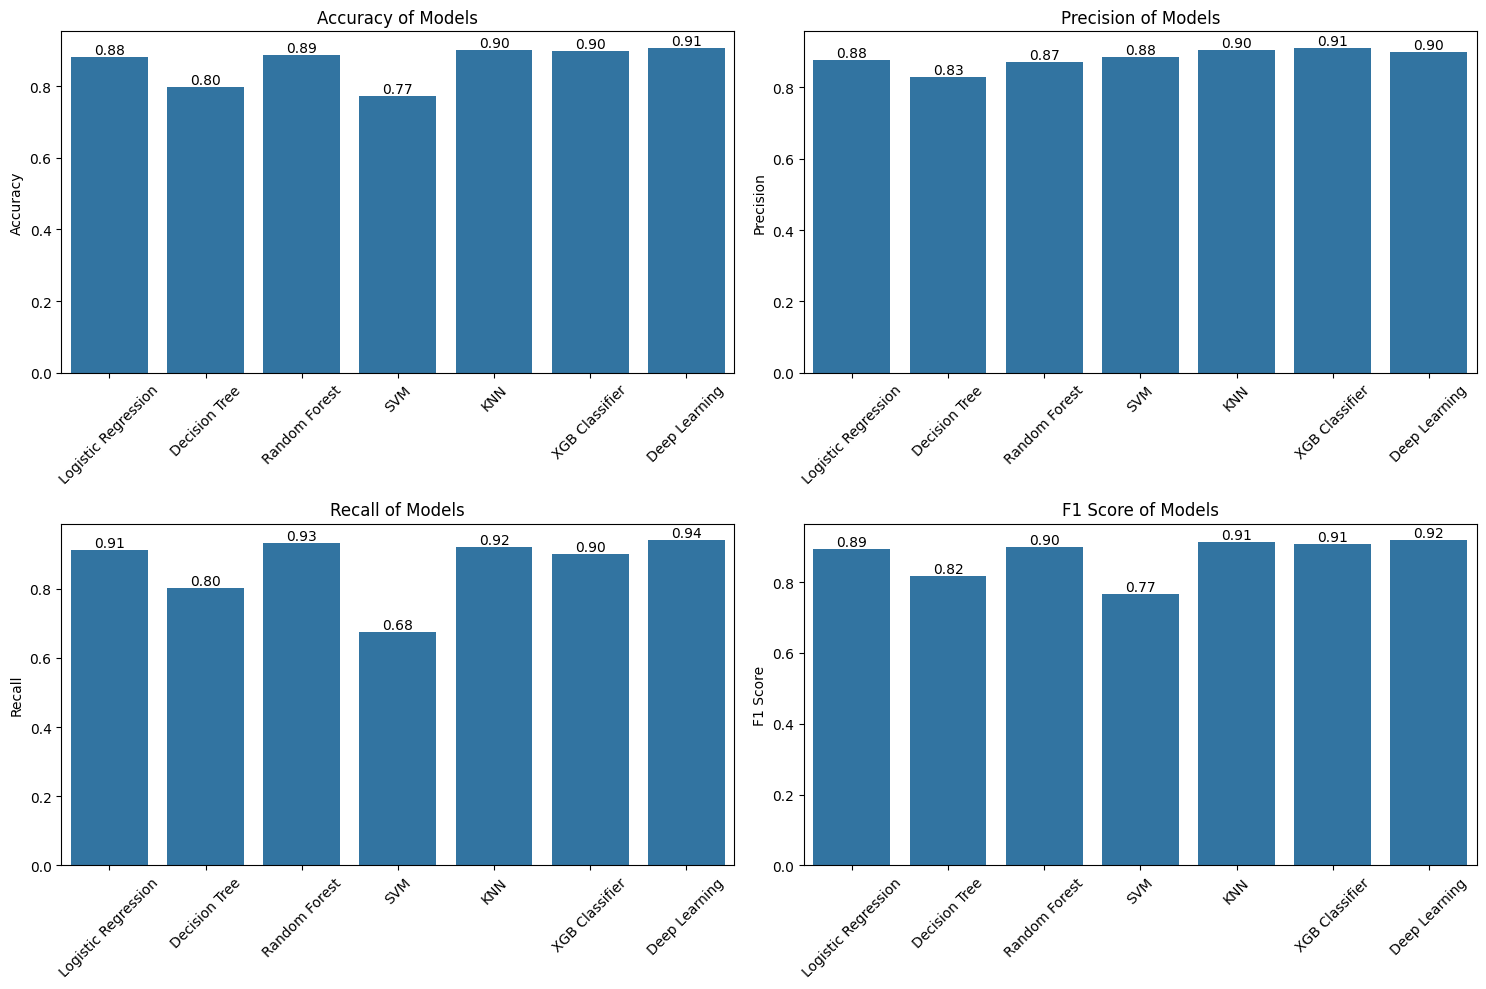

In [126]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(x=model_names, y=accuracies)
plt.title('Accuracy of Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Adding accuracy values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')


plt.subplot(2, 2, 2)
sns.barplot(x=model_names, y=precisions)
plt.title('Precision of Models')
plt.ylabel('Precision')
plt.xticks(rotation=45)

# Adding precision values on bars
for i, prec in enumerate(precisions):
    plt.text(i, prec, f'{prec:.2f}', ha='center', va='bottom')


plt.subplot(2, 2, 3)
sns.barplot(x=model_names, y=recalls)
plt.title('Recall of Models')
plt.ylabel('Recall')
plt.xticks(rotation=45)

# Adding precision values on bars
for i, rec in enumerate(recalls):
    plt.text(i, rec, f'{rec:.2f}', ha='center', va='bottom')


plt.subplot(2, 2, 4)
sns.barplot(x=model_names, y=f1_scores)
plt.title('F1 Score of Models')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)

# Adding precision values on bars
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1, f'{f1:.2f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

In [127]:
print(f"Accuracies: {accuracies}")

Accuracies: [0.8804347826086957, 0.7989130434782609, 0.8858695652173914, 0.7717391304347826, 0.9021739130434783, 0.8967391304347826, 0.907608695652174]


In [128]:
print(f"Precisions: {precisions}")

Precisions: [0.8773584905660378, 0.8282828282828283, 0.8715596330275229, 0.8846153846153846, 0.9038461538461539, 0.9108910891089109, 0.897196261682243]


In [129]:
print(f"Recalls: {recalls}")

Recalls: [0.9117647058823529, 0.803921568627451, 0.9313725490196079, 0.6764705882352942, 0.9215686274509803, 0.9019607843137255, 0.9411764705882353]


In [130]:
print(f"F1-Score: {f1_scores}")

F1-Score: [0.8942307692307693, 0.8159203980099502, 0.9004739336492891, 0.7666666666666667, 0.912621359223301, 0.9064039408866995, 0.9186602870813397]


In [131]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# generate classification report using predictions for binary model
best_model_pred = np.round(dl_model.predict(X_test_scaled)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, best_model_pred))
print(classification_report(y_test, best_model_pred))

dl_cm= confusion_matrix(y_test,best_model_pred)
dl_cm

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Results for Binary Model
0.907608695652174
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        82
           1       0.90      0.94      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.91       184
weighted avg       0.91      0.91      0.91       184



array([[71, 11],
       [ 6, 96]])

<Axes: >

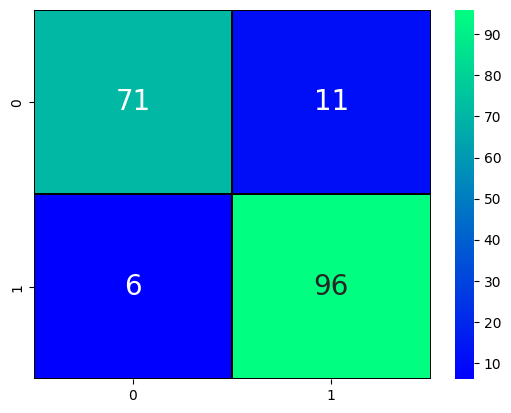

In [132]:
# Plot the confusion matrix
sns.heatmap(dl_cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

In [ ]:

import os
os.listdir()


In [ ]:
os.listdir("scaled_models")


In [ ]:
from google.colab import files

# ML models
files.download("scaled_models/lr_scaled_model.pkl")
files.download("scaled_models/dt_scaled_model.pkl")
files.download("scaled_models/rf_scaled_model.pkl")
files.download("scaled_models/svm_scaled_model.pkl")
files.download("scaled_models/knn_scaled_model.pkl")
files.download("scaled_models/xgb_scaled_model.pkl")

# Scaler and DL model
files.download("scaler_obj.joblib")
files.download("dl_best_model.keras")


In [146]:
from google.colab import files
files.download("dl_best_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>